### Import Statements

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cv2 as cv
import sys
import copy
import math

In [2]:
%matplotlib inline

In [3]:
from funcs import matplotlib_imshow

## **Template Matching ([Docs](https://docs.opencv.org/4.7.0/d4/dc6/tutorial_py_template_matching.html))**

Template Matching is a method for searching and finding the location of a template image in a larger image.

OpenCV comes with a function `cv.matchTemplate()` for this purpose. It simply slides the template image over the input image (as in 2D convolution) and compares the template and patch of input image under the template image. It returns a grayscale image, where each pixel denotes how much does the neighbourhood of that pixel match with template.

> The `cv.matchTemplate(image, templ, method)` function

<u>Function Parameters</u>

- image: Image to search over. It must be 8-bit or 32-bit floating-point.
- templ: Searched template. It must be smaller than the source image and have the same data type.
- method: Parameter specifying the comparison method. There are 6 available comparison methods namely, *cv.TM_CCOEFF, cv.TM_CCOEFF_NORMED, cv.TM_CCORR, cv.TM_CCORR_NORMED, cv.TM_SQDIFF, cv.TM_SQDIFF_NORMED*. See [TemplateMatchModes](https://docs.opencv.org/4.7.0/df/dfb/group__imgproc__object.html#ga3a7850640f1fe1f58fe91a2d7583695d) for details.

**Returns:** It returns a grayscale image, where each pixel denotes how much does the neighbourhood of that pixel match with template. If image is W×H and templ is w×h , then result is (W−w+1)×(H−h+1) .

When the object or template we are searching for has only a single instance in the given image, we can use `cv.minMaxLoc(result)` function to find where the maximum/minimum value is. These values can be used to determine the top-left corner of the matched region. This information can then be used to draw a rectangle over the matched region.

But, if the object or template we are searching for has multiple instances in the given image, we can't simply use `cv.minMaxLoc(result)` since it won't return all the locations. Instead we need to use a threshold value and determine the positions of the top-left corner of all the instances using, `np.where(result >= threshold)` and some other subsequent processing steps.

> ##### In the following example we will try to detect 'mario' from a screenshot of the super mario game

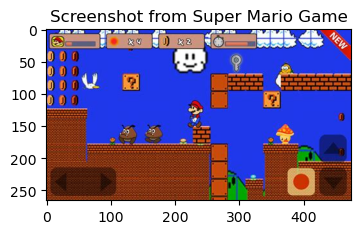

In [4]:
mario_game_scr = cv.imread("./imgs/mario_scr.jpeg")
matplotlib_imshow("Screenshot from Super Mario Game", mario_game_scr)

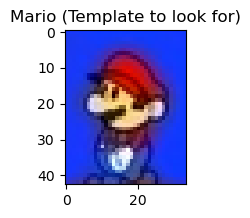

In [5]:
mario_templ = cv.imread("./imgs/mario_templ.png")
matplotlib_imshow("Mario (Template to look for)", mario_templ, 2)

In [6]:
result = cv.matchTemplate(mario_game_scr, mario_templ, cv.TM_CCOEFF_NORMED)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


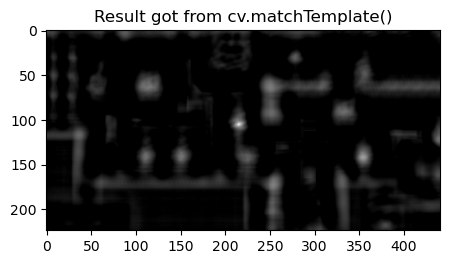

In [7]:
matplotlib_imshow("Result got from cv.matchTemplate()", result, 10)

In [8]:
min_val, max_val, min_loc, max_loc = cv.minMaxLoc(result)

In [9]:
top_left = max_loc

**Note:** If the method is cv.TM_SQDIFF or cv.TM_SQDIFF_NORMED, take minimum.

In [10]:
w, h = mario_templ.shape[:2]
bottom_right = (top_left[0] + w, top_left[1] + h)

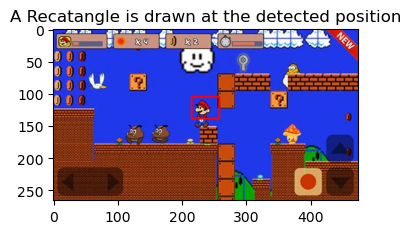

In [11]:
matplotlib_imshow(
    "A Recatangle is drawn at the detected position",
    cv.rectangle(mario_game_scr.copy(), top_left, bottom_right, (0, 0, 255), 2),
)

`Discussion:` Looks like we were able to detect the template in the source image correctly.

> ##### In the following example we will try to detect 'coins' from a screenshot of the super mario game

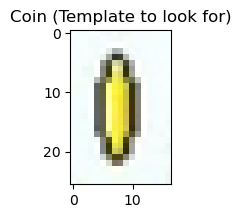

In [12]:
mario_coin_templ = cv.imread("./imgs/mario_coin_templ.png")
matplotlib_imshow("Coin (Template to look for)", mario_coin_templ, 2)

In [13]:
result = cv.matchTemplate(mario_game_scr, mario_coin_templ, cv.TM_CCOEFF_NORMED)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


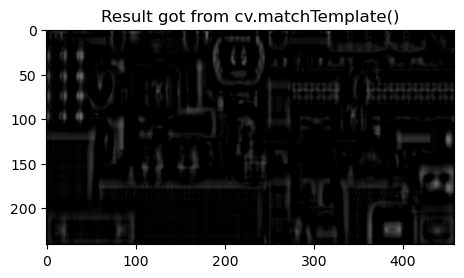

In [14]:
matplotlib_imshow("Result got from cv.matchTemplate()", result, 10)

In [15]:
threshold = 0.43

In [16]:
loc = np.where(result >= threshold)

In [17]:
loc

(array([ 30,  51,  52,  53,  54,  73,  74,  75,  76,  96,  97,  97,  98,
         98,  99, 122, 123, 123, 124, 125, 177, 178]),
 array([ 39,  39,  39,  39,  39,  39,  39,  39,  39,  38,  38,  39,  38,
         39,  39, 451, 451, 452, 451, 451, 451, 451]))

In [18]:
# loc gives a tuple containing two arrays that gives the y and x points of the top left corners
# to have them as points (x, y) we zip the two arrays
pts = list(zip(loc[1], loc[0]))

In [19]:
canvas = mario_game_scr.copy()

for pt in pts:
    top_left = pt
    w, h = 15, 18
    bottom_right = (top_left[0] + w, top_left[1] + h)
    cv.rectangle(canvas, top_left, bottom_right, (0, 0, 255), 2)

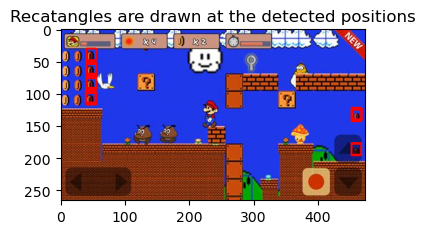

In [20]:
matplotlib_imshow(
    "Recatangles are drawn at the detected positions",
    canvas,
)

`Discussion:` Looks like we were able to detect only 6 out of the possible 15 coins (with many double detections). Some playing around with the threshold value shows that if threshold value is >= 0.5 it doesn't detect any of the coins. If threshold value is <=0.4 there are too many false detections and it doesn't even correctly detect more than 6 coins.

So, why is that? Maybe because of the template we used to search for the coins. The template we used was collected from a different image and has different background than the image we were searching over. Also the coins in the source image has varying colors (lighter and darker shades of yellow, and also some deep brown ones). The interesting thing is, the cv.matchTemplate() function was able to detect the deep brown coins and failed to detect lighter colored ones although the template is a coin of lighter shade of yellow.